# Dimensionality reduction

In [50]:
#importing libraries
from random import randint
import time
from time import sleep
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd

In [51]:
#Sklearn
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Read .csv and clean

In [52]:
read_hs = pd.read_csv('hot_songs_features.csv')
read_nhs = pd.read_csv('not_hot_songs_features.csv')

In [53]:
read_hs1 = read_hs.copy()
read_nhs1 = read_nhs.copy()

In [54]:
drop_hs = read_hs1.drop([99])

In [55]:
drop_hs.tail()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
94,East Side Of Sorrow,Zach Bryan,0.475,0.789,1.0,-6.124,1.0,0.0380,0.17000,0.00000,0.147,0.485,155.227,audio_features,6BOP0cv1eeXcvi1oE8bDVZ,spotify:track:6BOP0cv1eeXcvi1oE8bDVZ,https://api.spotify.com/v1/tracks/6BOP0cv1eeXc...,https://api.spotify.com/v1/audio-analysis/6BOP...,226091.0,4.0
95,Standing Room Only,Tim McGraw,0.731,0.622,5.0,-8.237,1.0,0.0979,0.17600,0.00000,0.153,0.445,82.494,audio_features,6VdBDm20nkyk6A29P785aJ,spotify:track:6VdBDm20nkyk6A29P785aJ,https://api.spotify.com/v1/tracks/6VdBDm20nkyk...,https://api.spotify.com/v1/audio-analysis/6VdB...,198034.0,4.0
96,Checkmate,Rod Wave,0.663,0.502,5.0,-7.070,1.0,0.0285,0.79100,0.00000,0.105,0.371,143.969,audio_features,3jfywRZH6cB2iLyKqo4EZd,spotify:track:3jfywRZH6cB2iLyKqo4EZd,https://api.spotify.com/v1/tracks/3jfywRZH6cB2...,https://api.spotify.com/v1/audio-analysis/3jfy...,183087.0,4.0
97,Can't Have Mine,Dylan Scott,0.481,0.539,4.0,-7.865,0.0,0.1080,0.55100,0.00539,0.120,0.621,153.277,audio_features,1o8Z7GD1CeOaVBEyuzu4HO,spotify:track:1o8Z7GD1CeOaVBEyuzu4HO,https://api.spotify.com/v1/tracks/1o8Z7GD1CeOa...,https://api.spotify.com/v1/audio-analysis/1o8Z...,186678.0,4.0
98,On My Mama,Victoria Monet,0.534,0.820,9.0,-3.440,1.0,0.0886,0.00376,0.00000,0.136,0.664,160.064,audio_features,1haoEnXbsUS3OFIWaUJ3wb,spotify:track:1haoEnXbsUS3OFIWaUJ3wb,https://api.spotify.com/v1/tracks/1haoEnXbsUS3...,https://api.spotify.com/v1/audio-analysis/1hao...,154517.0,4.0


In [56]:
drop_nhs = read_nhs1.drop([2294,2295,2296,2297])

In [57]:
drop_nhs.tail()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2289,La Bachata,Manuel Turizo,0.775,0.736,1.0,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,audio_features,2g6tReTlM2Akp41g0HaeXN,spotify:track:2g6tReTlM2Akp41g0HaeXN,https://api.spotify.com/v1/tracks/2g6tReTlM2Ak...,https://api.spotify.com/v1/audio-analysis/2g6t...,239027.0,4.0
2290,Until I Found You,Stephen Sanchez,0.935,0.807,11.0,-3.838,0.0,0.1140,0.05140,0.000000,0.3490,0.813,106.017,audio_features,6Zu3aw7FfjAF9WA0fA81Oq,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182.0,4.0
2291,Made You Look,Meghan Trainor,0.751,0.468,5.0,-9.251,1.0,0.3130,0.15000,0.000015,0.1920,0.214,150.009,audio_features,1DlLCrqbalAshwtMexNkGR,spotify:track:1DlLCrqbalAshwtMexNkGR,https://api.spotify.com/v1/tracks/1DlLCrqbalAs...,https://api.spotify.com/v1/audio-analysis/1DlL...,184842.0,4.0
2292,Midnight Rain,Taylor Swift,0.773,0.422,1.0,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,audio_features,3XOalgusokruzA5ZBA2Qcb,spotify:track:3XOalgusokruzA5ZBA2Qcb,https://api.spotify.com/v1/tracks/3XOalgusokru...,https://api.spotify.com/v1/audio-analysis/3XOa...,136267.0,1.0
2293,Die Hard,Kendrick Lamar,0.376,0.657,7.0,-4.658,1.0,0.0768,0.08580,0.000000,0.0884,0.203,80.565,audio_features,1r8ZCjfrQxoy2wVaBUbpwg,spotify:track:1r8ZCjfrQxoy2wVaBUbpwg,https://api.spotify.com/v1/tracks/1r8ZCjfrQxoy...,https://api.spotify.com/v1/audio-analysis/1r8Z...,164782.0,4.0


In [58]:
#Save the final dataframes
drop_hs.to_csv("hot_songs_features_final.csv", index=False)
drop_nhs.to_csv("not_hot_songs_features_final.csv", index=False)

### Hot or not_hot songs (Y/N)

In [59]:
#Read df
hot_songs_features = pd.read_csv('hot_songs_features_final.csv')
not_hot_songs_features = pd.read_csv('not_hot_songs_features_final.csv')

In [60]:
# hot_song_features["Hot"] = "Y"
# not_hot_songs["Hot"] = "N"

In [61]:
hot_songs_features["Hot"] = "Y"
hot_songs_features

#save df
hot_songs_features.to_csv("hot_songs_features_yes.csv", index=False)

In [62]:
not_hot_songs_features["Hot"] = "N"
not_hot_songs_features

#save df
not_hot_songs_features.to_csv("not_hot_songs_features_no.csv", index=False)

_____

## Concat DataFrame 


In [63]:
concat_features_df = pd.concat([hot_songs_features, not_hot_songs_features], axis=0) 
concat_features_df.head(1)

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot
0,Paint The Town Red,Doja Cat,0.864,0.556,2.0,-7.683,0.0,0.194,0.255,0.000004,...,0.726,99.974,audio_features,56y1jOTK0XSvJzVv9vHQBK,spotify:track:56y1jOTK0XSvJzVv9vHQBK,https://api.spotify.com/v1/tracks/56y1jOTK0XSv...,https://api.spotify.com/v1/audio-analysis/56y1...,230480.0,4.0,Y


In [64]:
#save df

concat_features_df.to_csv("concat_features_final.csv", index=False)

In [65]:
concat_features_df.shape

(2393, 21)

In [66]:
concat_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2393 entries, 0 to 2293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2393 non-null   object 
 1   Artist            2393 non-null   object 
 2   danceability      2393 non-null   float64
 3   energy            2393 non-null   float64
 4   key               2393 non-null   float64
 5   loudness          2393 non-null   float64
 6   mode              2393 non-null   float64
 7   speechiness       2393 non-null   float64
 8   acousticness      2393 non-null   float64
 9   instrumentalness  2393 non-null   float64
 10  liveness          2393 non-null   float64
 11  valence           2393 non-null   float64
 12  tempo             2393 non-null   float64
 13  type              2393 non-null   object 
 14  id                2393 non-null   object 
 15  uri               2393 non-null   object 
 16  track_href        2393 non-null   object 
 17  

In [67]:
features = concat_features_df.iloc[:, list(range(2, 13)) + list(range(18, 20))].copy()
features.head(50)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.864,0.5560,2.0,-7.683,0.0,0.1940,0.255000,0.000004,0.1120,0.726,99.974,230480.0,4.0
1,0.559,0.5510,5.0,-7.231,1.0,0.1320,0.141000,0.000000,0.1100,0.392,143.008,201800.0,4.0
2,0.551,0.8010,6.0,-5.069,1.0,0.0303,0.013000,0.000006,0.2650,0.625,128.027,240760.0,4.0
3,0.666,0.8710,1.0,-6.017,0.0,0.0272,0.270000,0.020800,0.2630,0.936,108.501,215326.0,4.0
4,0.429,0.4530,0.0,-7.746,1.0,0.0459,0.554000,0.000002,0.1020,0.155,77.639,227196.0,4.0
5,0.517,0.6750,6.0,-5.382,1.0,0.0357,0.459000,0.000000,0.1510,0.518,203.853,163855.0,4.0
6,0.675,0.6090,1.0,-7.905,1.0,0.0940,0.284000,0.268000,0.1120,0.057,119.973,300000.0,4.0
7,0.847,0.6220,1.0,-6.747,0.0,0.0903,0.119000,0.000000,0.2850,0.220,130.001,125040.0,4.0
8,0.801,0.8060,11.0,-5.206,1.0,0.0381,0.382000,0.000669,0.1140,0.802,106.999,239318.0,4.0
9,0.671,0.8450,11.0,-4.930,0.0,0.0480,0.020700,0.000000,0.3290,0.775,110.056,176579.0,4.0


## Scaling features


In [68]:
features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000
mean,0.654972,0.682573,5.246135,-6.050226,0.611366,0.097543,0.175801,0.029112,0.174655,0.530481,121.136483,223321.473046,3.974091
std,0.143712,0.176478,3.594404,2.677144,0.487542,0.092555,0.228216,0.136587,0.135874,0.231151,27.848254,44775.877261,0.252408
min,0.162000,0.009370,0.000000,-34.840000,0.000000,0.022500,0.000013,0.000000,0.021000,0.000010,50.141000,62253.000000,1.000000
25%,0.562000,0.576000,2.000000,-7.054000,0.000000,0.038000,0.018500,0.000000,0.090700,0.354000,99.050000,197547.000000,4.000000
50%,0.665000,0.706000,5.000000,-5.613000,1.000000,0.057300,0.076100,0.000000,0.120000,0.536000,120.040000,220291.000000,4.000000
75%,0.757000,0.816000,8.000000,-4.381000,1.000000,0.113000,0.237000,0.000064,0.222000,0.717000,138.015000,245000.000000,4.000000
max,0.975000,0.988000,11.000000,-0.276000,1.000000,0.591000,0.995000,0.991000,0.971000,0.974000,210.857000,688453.000000,5.000000


In [69]:
# Initialize the model, fit and transform data
scaler = StandardScaler()
scaler.fit(features)

filename = "songs_scaler.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(scaler,file)

features_scaled = scaler.transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns = features.columns)

In [70]:
features_scaled_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.454791,-0.717367,-0.903297,-0.610021,-1.254240,1.042370,0.347109,-0.213159,-0.461220,0.846027,-0.760080,0.159908,0.102668
1,-0.667945,-0.745705,-0.068491,-0.441149,0.797295,0.372360,-0.152522,-0.213187,-0.475943,-0.599216,0.785546,-0.480749,0.102668
2,-0.723624,0.671201,0.209777,0.366596,0.797295,-0.726673,-0.713511,-0.213143,0.665060,0.408992,0.247483,0.389544,0.102668


### PCA

In [71]:
from sklearn.decomposition import PCA

# When we create an instance of PCA, we can specify how many principal components we want to extract.
# However, as we don't know beforehand how much variance it will explain each principal component it's
# allways better to not set the option "n_components" to a given integer number.

pca =PCA() #instance of the function
pca.fit(features_scaled_df) #we use the scaled dataframe
principal_components = pca.transform(features_scaled_df) #transform the data to scaler PCA, np.array

principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,features_scaled_df.shape[1]+1)])
#transform to DataFrame
#for columns: set the name to be "PCA_number" 

principal_components_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,0.149442,-2.291443,-0.570646,-0.029856,1.079605,0.252891,0.250975,-1.048253,0.150435,-0.264345,0.229729,0.224841,-0.016145
1,0.834009,0.661565,-0.039238,-0.638074,-0.036820,0.920871,-0.677748,0.227240,-0.405213,0.308296,-0.297133,0.426402,-0.239358
2,-0.913617,1.227355,-0.042173,-0.089479,-0.449133,-0.453721,0.149601,0.699256,0.256766,-0.357394,-0.038991,0.485959,-0.052679
3,-1.061876,-0.711208,-0.176099,-0.073551,-0.774499,-0.699600,1.111297,-1.262973,0.339408,-1.131749,1.141240,0.377862,0.433185
4,2.861587,1.141353,-1.999040,0.049371,0.137282,-0.386465,0.421235,-0.409364,-0.848611,0.416150,0.936383,-0.189874,-0.118735


In [72]:
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.205534218731137,
 0.3175065364273965,
 0.40397068484785364,
 0.4900355490815445,
 0.5719632485986644,
 0.6492518891781666,
 0.7246314567681478,
 0.7907672889644302,
 0.8561162358910788,
 0.9084669556056593,
 0.9537283996431611,
 0.9841766641749339,
 1.0000000000000002]

This method is not appropiate to reduce the columns because we would need to many and that is not what we want

### ISOMAP

In [73]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=25, n_components=2)
iso.fit(features_scaled_df)
X_isomap_transformed = iso.transform(features_scaled_df)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

,ISO_1,ISO_2
0,-3.905851,0.813577
1,2.953995,0.310399
2,2.502300,-2.044468
3,-4.923283,-1.207715
4,3.154791,4.036344


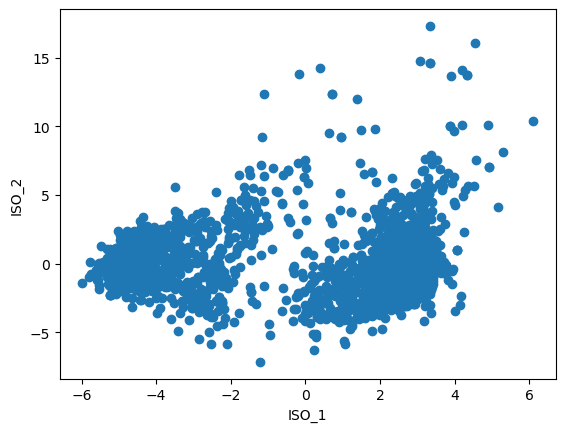

In [74]:
fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

### TSNE

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=40, random_state=12)

X_tsne_transformed = tsne.fit_transform(features_scaled_df)
                                        
# use pickle to save the tnse. tnse.transformUser_dong_audio_features_Scaled)
filename = "tsne_transform.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(tsne,file)

X_tsne_transformed_df = pd.DataFrame(X_tsne_transformed, columns=["TSNE_1","TSNE_2"])
X_tsne_transformed_df.head()

,TSNE_1,TSNE_2
0,10.838326,30.759056
1,-7.333102,-15.722075
2,31.624178,-15.604887
3,1.194394,48.584084
4,-24.554382,-13.158829


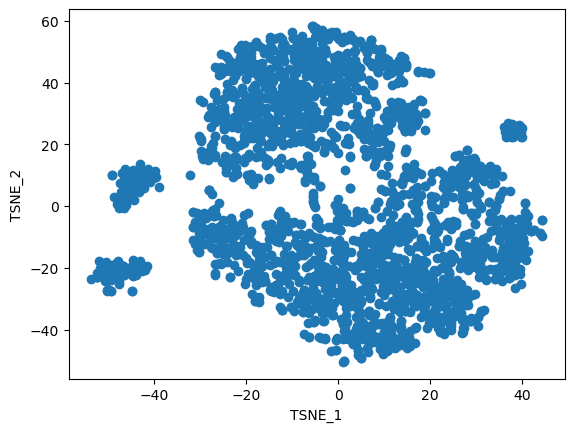

In [76]:
fig, ax = plt.subplots()
ax.scatter(X_tsne_transformed_df['TSNE_1'],X_tsne_transformed_df['TSNE_2'])
ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")
plt.show()

# Clustering

### K-MEAN

As our clusters are globular we will use K-MEAN to do the clustering

In [77]:
#scale the features
#apply tsne on scaled features
#apply k-means or others

### Clustering the wines with K-Means

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters should we have.

When randomness is involved (remember, K-means picks randomly the initial centroids), we better use a random seed so that we can reproduce our results. We can set this directly to the argument random_state.

In [78]:
# Initializing the model, fit and predict clusters

kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_tsne_transformed_df)

# save the kmeans with pickle
filename = "kmeans.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

/Users/marina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
clusters = kmeans.predict(X_tsne_transformed_df)
#clusters
pd.Series(clusters).value_counts().sort_index()


0    305
1    437
2    793
3    457
4    401
Name: count, dtype: int64

In [80]:
features['clusters']=clusters
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.864,0.556,2.0,-7.683,0.0,0.1940,0.255,0.000004,0.112,0.726,99.974,230480.0,4.0,2
1,0.559,0.551,5.0,-7.231,1.0,0.1320,0.141,0.000000,0.110,0.392,143.008,201800.0,4.0,4
2,0.551,0.801,6.0,-5.069,1.0,0.0303,0.013,0.000006,0.265,0.625,128.027,240760.0,4.0,3
3,0.666,0.871,1.0,-6.017,0.0,0.0272,0.270,0.020800,0.263,0.936,108.501,215326.0,4.0,2
4,0.429,0.453,0.0,-7.746,1.0,0.0459,0.554,0.000002,0.102,0.155,77.639,227196.0,4.0,0


In [81]:
#features[(features['cluster']== 'N') & (features['cluster']== 'clusters')].sample()

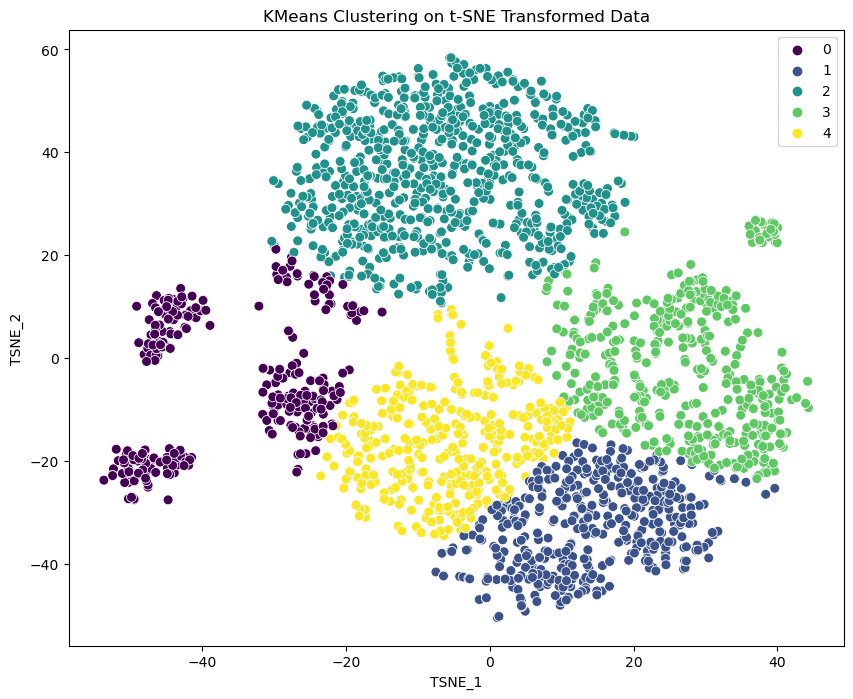

In [82]:
# plot the kmeans
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE_1', y='TSNE_2',hue=clusters, data=X_tsne_transformed_df, palette='viridis', s=50)
plt.title('KMeans Clustering on t-SNE Transformed Data')
plt.show()

### DBSCAN

In [83]:
from dbcv import *

In [84]:
dbscan = DBSCAN(eps=0.5, min_samples=4) # Epsilon=distance, MinPoints=min_samples
values = dbscan.fit_predict(X_tsne_transformed_df)

In [85]:
X_tsne_transformed_df1 = X_tsne_transformed_df.copy()
X_tsne_transformed_df1

,TSNE_1,TSNE_2
0,10.838326,30.759056
1,-7.333102,-15.722075
2,31.624178,-15.604887
3,1.194394,48.584084
4,-24.554382,-13.158829
...,...,...
2388,-20.420828,20.583891
2389,5.759088,51.923611
2390,14.385690,9.907393
2391,-49.776318,-27.061184


In [86]:
X_tsne_transformed_df1['dbscan_clusters'] = values
X_tsne_transformed_df1

,TSNE_1,TSNE_2,dbscan_clusters
0,10.838326,30.759056,-1
1,-7.333102,-15.722075,-1
2,31.624178,-15.604887,-1
3,1.194394,48.584084,-1
4,-24.554382,-13.158829,-1
...,...,...,...
2388,-20.420828,20.583891,-1
2389,5.759088,51.923611,-1
2390,14.385690,9.907393,-1
2391,-49.776318,-27.061184,0


In [87]:
X_tsne_transformed_df1['dbscan_clusters'].value_counts().sort_index()

dbscan_clusters
-1    2380
 0       4
 1       5
 2       4
Name: count, dtype: int64

In [88]:
dbscan_clusters = np.unique(values)
dbscan_clusters

array([-1,  0,  1,  2])

In [89]:
[dbscan_cluster for dbscan_cluster in list(dbscan_clusters) if cluster != -1]

[-1, 0, 1, 2]

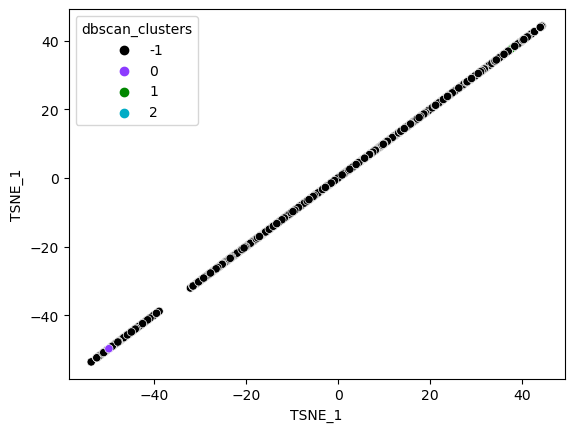

In [90]:
X_tsne_transformed_df1['dbscan_clusters'] = values
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=dbscan_clusters.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1" #(R,G,B)
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(dbscan_clusters,custom_palette)]
sns.scatterplot(X_tsne_transformed_df1, x="TSNE_1", y="TSNE_1", hue="dbscan_clusters", palette=custom_palette);
plt.show()

### HDBSCAN

In [91]:
# min_samples = 2 * # columns = 2 * 2 = 4
# For every point get what is the distance between each point and the 4-Nearest-Neigbourh
# Sort these distances in descending order, and plot them
# Look where the curve starts to flatten to get the optimal epsilon

In [92]:
from sklearn.cluster import HDBSCAN

In [93]:
X_tsne_transformed_df2 = X_tsne_transformed_df.copy()
X_tsne_transformed_df2

,TSNE_1,TSNE_2
0,10.838326,30.759056
1,-7.333102,-15.722075
2,31.624178,-15.604887
3,1.194394,48.584084
4,-24.554382,-13.158829
...,...,...
2388,-20.420828,20.583891
2389,5.759088,51.923611
2390,14.385690,9.907393
2391,-49.776318,-27.061184


In [94]:
model = HDBSCAN()
values1 = model.fit_predict(X_tsne_transformed_df2)

In [95]:
hdbscan_clusters = np.unique(values1)
hdbscan_clusters

array([-1,  0,  1,  2,  3,  4])

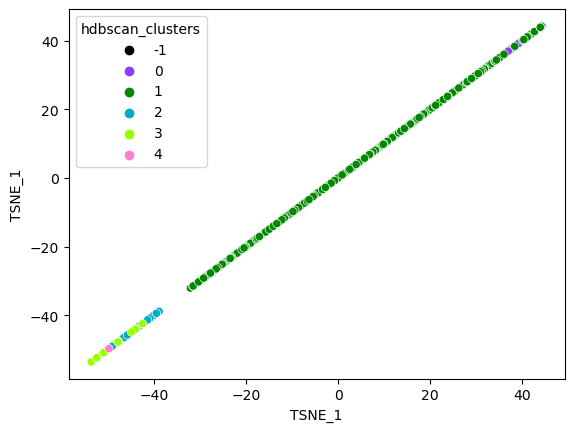

In [96]:
X_tsne_transformed_df2['hdbscan_clusters'] = values1
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=hdbscan_clusters.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1" #(R,G,B)
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(hdbscan_clusters,custom_palette)]
sns.scatterplot(X_tsne_transformed_df2, x="TSNE_1", y="TSNE_1", hue="hdbscan_clusters", palette=custom_palette);
plt.show()